In [2]:
#import required libraries
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,GlobalMaxPooling2D,Flatten,Dropout
from tensorflow.python.keras.models import Sequential
import tensorflow as tf
from keras.layers import Input

#Data Processing

##Loading the data

In [3]:
!cd /content/drive/MyDrive
dataset=pd.read_csv('/content/drive/MyDrive/devanagiri.csv').fillna(value = 'notgiven')
dataset=pd.DataFrame(dataset)


In [4]:
dataset.dtypes

label     object
x_0        int64
x_1        int64
x_2        int64
x_3        int64
           ...  
x_3067     int64
x_3068     int64
x_3069     int64
x_3070     int64
x_3071     int64
Length: 3073, dtype: object

In [5]:
#Extracting label column from the dataset
label=dataset["label"].to_numpy()
del dataset["label"]
label

array(['i', 'ti', 'a', ..., 'ma', 'taa', 'va'], dtype=object)

In [6]:
dataset.to_numpy(dtype='int')

array([[211, 243, 254, ..., 213, 242, 247],
       [201, 229, 236, ..., 204, 233, 242],
       [214, 243, 252, ..., 192, 221, 230],
       ...,
       [192, 230, 246, ..., 194, 233, 248],
       [193, 231, 247, ..., 190, 229, 244],
       [201, 232, 249, ..., 195, 234, 249]])

In [7]:
dataset=np.array(dataset).astype('int')

##Visualizing the data

In [8]:
dataset.shape

(7702, 3072)

In [9]:
label.shape

(7702,)

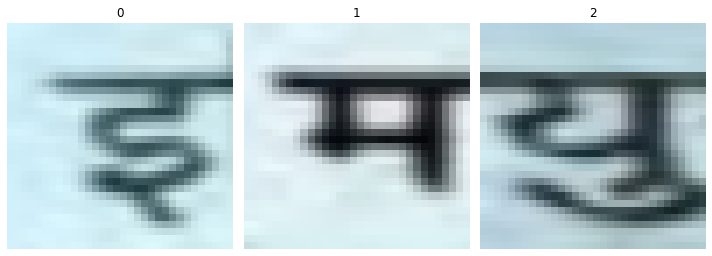

In [10]:
dict={}
count=0
#range(start,stop,step)
for i in range(0,7702,3072):
    imarray=np.array(dataset[i].reshape(32,32,3))
    dict.update({count:imarray}) 
    count=count+1
    if count >= 7702:
        break
       
figure, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,10) )
for ind,title in enumerate(dict):
    ax.ravel()[ind].imshow(dict[title])
    ax.ravel()[ind].set_title(title)
    ax.ravel()[ind].set_axis_off()
plt.tight_layout()
plt.show()

## One Hot encoding

In [11]:
values = array(label)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['i' 'ti' 'a' ... 'ma' 'taa' 'va']
[195 504  83 ... 266 492 555]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['i']


## Splitting the data and reshaping the Train and Test set

In [12]:
X_train, X_test, y_train, y_test=train_test_split(dataset.astype("float32"),onehot_encoded, test_size=0.2, random_state=42) # Train and Test set 
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train, test_size=0.1, random_state=42) # Train and Validation set
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((5544, 3072), (1541, 3072), (617, 3072), (5544, 602), (1541, 602), (617, 602))

In [13]:
X_train=(X_train.reshape(5544,32,32,3))/255
X_test=(X_test.reshape(1541,32,32,3))/255
X_val=(X_val.reshape(617,32,32,3))/255

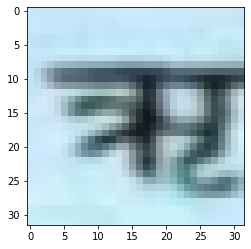

In [14]:
plt.imshow(X_train[44])

In [15]:
X_train.dtype

dtype('float32')

# Problem Statement A

## Without Data Augumentation

### ANN

In [45]:
# Model
model0 = Sequential()

model0.add(Dense(2,input_shape = (32,32,3),activation = 'relu'))
model0.add(Dropout(0.4))
model0.add(Flatten())
model0.add(Dense(1024,activation='relu'))
model0.add(Dropout(0.4))
model0.add(Dense(602, activation='softmax'))
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 2)         8         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 2)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 602)               617050    
Total params: 2,715,234
Trainable params: 2,715,234
Non-trainable params: 0
______________________________________________

In [50]:
# Training the model
history0=model0.fit(X_train,y_train,batch_size=50, epochs=100, validation_split=None,validation_data=(X_val,y_val))

Epoch 1/20
111/111 [==============================] - 1s 9ms/step - loss: 0.7118 - acc: 0.7962 - val_loss: 2.7007 - val_acc: 0.7699
Epoch 2/20
111/111 [==============================] - 1s 9ms/step - loss: 0.7259 - acc: 0.7897 - val_loss: 2.6641 - val_acc: 0.7650
Epoch 3/20
111/111 [==============================] - 1s 9ms/step - loss: 0.7106 - acc: 0.7940 - val_loss: 2.6631 - val_acc: 0.7682
Epoch 4/20
111/111 [==============================] - 1s 9ms/step - loss: 0.6853 - acc: 0.8025 - val_loss: 2.6550 - val_acc: 0.7666
Epoch 5/20
111/111 [==============================] - 1s 9ms/step - loss: 0.6992 - acc: 0.7946 - val_loss: 2.6759 - val_acc: 0.7536
Epoch 6/20
111/111 [==============================] - 1s 9ms/step - loss: 0.7023 - acc: 0.7958 - val_loss: 2.7548 - val_acc: 0.7666
Epoch 7/20
111/111 [==============================] - 1s 9ms/step - loss: 0.6997 - acc: 0.8025 - val_loss: 2.7899 - val_acc: 0.7682
Epoch 8/20
111/111 [==============================] - 1s 9ms/step - loss: 0.

In [51]:
# EValuating th emodel
model0.evaluate(
    x=X_test,
    y=y_test,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    #**kwargs
)

49/49 [==============================] - 0s 5ms/step - loss: 2.8131 - acc: 0.7592


[2.8131301403045654, 0.7592472434043884]

### CNN

In [16]:
# Model
model1 = Sequential()

model1.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(128,(3,3),activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(602, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4

In [17]:
# Training the model
history1=model1.fit(X_train,y_train,batch_size=50, epochs=20, validation_split=None,validation_data=(X_val,y_val))

Epoch 1/20
111/111 [==============================] - 15s 18ms/step - loss: 4.9813 - acc: 0.1219 - val_loss: 3.9799 - val_acc: 0.2982
Epoch 2/20
111/111 [==============================] - 2s 14ms/step - loss: 3.1849 - acc: 0.4069 - val_loss: 2.7572 - val_acc: 0.5316
Epoch 3/20
111/111 [==============================] - 1s 13ms/step - loss: 2.0231 - acc: 0.6109 - val_loss: 2.2057 - val_acc: 0.6402
Epoch 4/20
111/111 [==============================] - 1s 13ms/step - loss: 1.2779 - acc: 0.7370 - val_loss: 1.8958 - val_acc: 0.7196
Epoch 5/20
111/111 [==============================] - 1s 13ms/step - loss: 0.8712 - acc: 0.8030 - val_loss: 1.9438 - val_acc: 0.7455
Epoch 6/20
111/111 [==============================] - 2s 14ms/step - loss: 0.6167 - acc: 0.8519 - val_loss: 1.8809 - val_acc: 0.7536
Epoch 7/20
111/111 [==============================] - 1s 13ms/step - loss: 0.4456 - acc: 0.8909 - val_loss: 1.8700 - val_acc: 0.7601
Epoch 8/20
111/111 [==============================] - 1s 13ms/step -

In [19]:
# Evaluating the model
model1.evaluate(
    x=X_test,
    y=y_test,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    #**kwargs
)

49/49 [==============================] - 0s 6ms/step - loss: 2.3833 - acc: 0.7846


[2.3832919597625732, 0.7845554947853088]

### SVM

In [98]:
from tensorflow.keras.regularizers import l2
model2 = Sequential()

model2.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128,(3,3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dense(602, kernel_regularizer = l2(0.01), activation='softmax'))
model2.compile(optimizer='adam',loss='squared_hinge', metrics = ['accuracy'])
model2.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 1024)            

In [99]:
# Training the model
history2=model2.fit(X_train,y_train,batch_size=50, epochs=500, validation_split=None,validation_data=(X_val,y_val))

Epoch 1/500
111/111 [==============================] - 2s 15ms/step - loss: 2.1672 - accuracy: 0.0287 - val_loss: 1.0035 - val_accuracy: 0.0405
Epoch 2/500
111/111 [==============================] - 1s 13ms/step - loss: 1.0033 - accuracy: 0.0400 - val_loss: 1.0033 - val_accuracy: 0.0405
Epoch 3/500
111/111 [==============================] - 1s 13ms/step - loss: 1.0033 - accuracy: 0.0400 - val_loss: 1.0033 - val_accuracy: 0.0405
Epoch 4/500
111/111 [==============================] - 1s 13ms/step - loss: 1.0033 - accuracy: 0.0400 - val_loss: 1.0033 - val_accuracy: 0.0405
Epoch 5/500
111/111 [==============================] - 1s 13ms/step - loss: 1.0033 - accuracy: 0.0400 - val_loss: 1.0033 - val_accuracy: 0.0405
Epoch 6/500
111/111 [==============================] - 1s 13ms/step - loss: 1.0033 - accuracy: 0.0400 - val_loss: 1.0033 - val_accuracy: 0.0405
Epoch 7/500
111/111 [==============================] - 1s 13ms/step - loss: 1.0033 - accuracy: 0.0400 - val_loss: 1.0033 - val_accuracy:

In [100]:
model2.evaluate(
    x=X_test,
    y=y_test,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    #**kwargs
)

49/49 [==============================] - 0s 6ms/step - loss: 1.0018 - accuracy: 0.3355


[1.001829981803894, 0.3354964256286621]

## With Data Agumentation

### Data Augumentation


In [52]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

In [53]:
x=aug.flow(X_train, y_train, batch_size=50)

### CNN

In [54]:
model4 = Sequential()

model4.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(128,(3,3),activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))

model4.add(Flatten())
model4.add(Dense(1024,activation='relu'))
model4.add(Dense(602, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [55]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)             

In [56]:
history4=model4.fit(x,steps_per_epoch=len(X_train) // 20, epochs=50, validation_split=None,validation_data=(X_val,y_val)) 
# Increase the epochs for better training not more than epochs =75 as it undergoes overfitting

Epoch 1/50
277/277 [==============================] - 13s 44ms/step - loss: 5.1714 - acc: 0.0453 - val_loss: 5.0653 - val_acc: 0.0859
Epoch 2/50
277/277 [==============================] - 12s 43ms/step - loss: 4.5752 - acc: 0.1225 - val_loss: 4.0006 - val_acc: 0.2512
Epoch 3/50
277/277 [==============================] - 12s 43ms/step - loss: 3.8111 - acc: 0.2293 - val_loss: 3.3574 - val_acc: 0.4036
Epoch 4/50
277/277 [==============================] - 12s 43ms/step - loss: 3.2302 - acc: 0.3183 - val_loss: 2.8354 - val_acc: 0.5203
Epoch 5/50
277/277 [==============================] - 12s 43ms/step - loss: 2.7865 - acc: 0.3976 - val_loss: 2.5241 - val_acc: 0.5851
Epoch 6/50
277/277 [==============================] - 12s 43ms/step - loss: 2.4644 - acc: 0.4571 - val_loss: 2.3998 - val_acc: 0.6386
Epoch 7/50
277/277 [==============================] - 12s 43ms/step - loss: 2.2160 - acc: 0.5110 - val_loss: 2.3260 - val_acc: 0.6580
Epoch 8/50
277/277 [==============================] - 12s 43ms

In [57]:
model4.evaluate(
    x=X_test,
    y=y_test,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    #**kwargs
)

49/49 [==============================] - 0s 6ms/step - loss: 2.2261 - acc: 0.8319


[2.226138114929199, 0.8319272994995117]

**Among all the above mentioned method CNN (with data augmentation) performs better and avoids overfitting**

## Plots

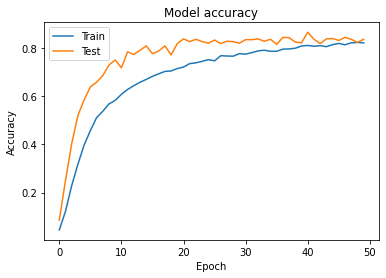

In [58]:
#Plot of Model accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

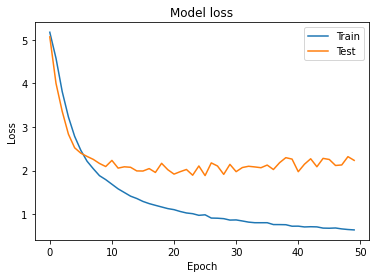

In [59]:
# Plot training & validation loss values
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#Problem Statement B

The Problem Statement B is Image retreival. My approach for this probelm is as follows:
- **Feature Extraction**( Extract the features like texture, color, shape etc), for this I have used auto encoder and CNN (defined in problem Statement A, one can use pretrained models like VGG16, VGG19, RESNET) but one can differnet methods to extarct a feature dependind on type of feature. 
- **Evaluation**:  After extracting the features from the trained images and query images, calculate the similarity by using metrics like eudledian distance, cosine similarity, manhattan distance etc. In this problem I have used eucledian distance but it can be changed.

**In my view, for this problem the best solution depends on feature extraction.**

## Using Auto encoders to extract feature

In [30]:
from tensorflow.keras.models import save_model
import tensorflow.keras.layers as L

In [31]:
def build_deep_autoencoder(img_shape, code_size):
    H,W,C = img_shape
    
    # encoder
    encoder = tf.keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    
    ### YOUR CODE HERE: define encoder as per instructions above ###
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size))

    # decoder
    decoder = tf.keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    
    ### YOUR CODE HERE: define decoder as per instructions above ###
    decoder.add(L.Dense(2*2*256))
    decoder.add(L.Reshape((2, 2, 256)))
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

In [32]:
# Check autoencoder shapes along different code_sizes
IMG_SHAPE=(32,32,3)
get_dim = lambda layer: np.prod(layer.output_shape[1:])
for code_size in [1,8,32,128,512]:
    tf.keras.backend.clear_session()
    encoder, decoder = build_deep_autoencoder(IMG_SHAPE, code_size=code_size)
    print("Testing code size %i" % code_size)
    assert encoder.output_shape[1:]==(code_size,),"encoder must output a code of required size"
    assert decoder.output_shape[1:]==IMG_SHAPE,   "decoder must output an image of valid shape"
    assert len(encoder.trainable_weights)>=6,     "encoder must contain at least 3 layers"
    assert len(decoder.trainable_weights)>=6,     "decoder must contain at least 3 layers"
    
    for layer in encoder.layers + decoder.layers:
        assert get_dim(layer) >= code_size, "Encoder layer %s is smaller than bottleneck (%i units)"%(layer.name,get_dim(layer))

print("All tests passed!")

Testing code size 1
Testing code size 8
Testing code size 32
Testing code size 128
Testing code size 512
All tests passed!


In [33]:
tf.keras.backend.clear_session()
encoder, decoder = build_deep_autoencoder(IMG_SHAPE, code_size=32)
encoder.summary()
decoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [34]:
inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

In [35]:
autoencoder = tf.keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')

In [36]:
# we will save model checkpoints here to continue training in case of kernel death
model_filename = 'autoencoder.{0:03d}.hdf5'
last_finished_epoch = None

In [37]:
#Saving the model
class ModelSaveCallback(tf.keras.callbacks.Callback):
    def __init__(self, file_name):
        super(ModelSaveCallback, self).__init__()
        self.file_name = file_name

    def on_epoch_end(self, epoch, logs=None):
        model_filename = self.file_name.format(epoch)
        save_model(self.model, model_filename)
        print("Model saved in {}".format(model_filename))



In [38]:
#Training the auto encoder
autoencoder.fit(x=X_train, y=X_train, epochs=25,
                validation_data=[X_test, X_test],
                callbacks=[ModelSaveCallback(model_filename)],
                           #keras_utils.TqdmProgressCallback()],
                verbose=1,
                initial_epoch=last_finished_epoch or 0)

Epoch 1/25
174/174 [==============================] - 6s 27ms/step - loss: 0.0616 - val_loss: 0.0291
Epoch 2/25
174/174 [==============================] - 3s 19ms/step - loss: 0.0248 - val_loss: 0.0216
Epoch 3/25
174/174 [==============================] - 3s 17ms/step - loss: 0.0192 - val_loss: 0.0172
Epoch 4/25
174/174 [==============================] - 3s 17ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 5/25
174/174 [==============================] - 3s 17ms/step - loss: 0.0135 - val_loss: 0.0123
Epoch 6/25
174/174 [==============================] - 3s 17ms/step - loss: 0.0114 - val_loss: 0.0108
Epoch 7/25
174/174 [==============================] - 3s 17ms/step - loss: 0.0101 - val_loss: 0.0110
Epoch 8/25
174/174 [==============================] - 3s 17ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 9/25
174/174 [==============================] - 3s 18ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 10/25
174/174 [==============================] - 3s 18ms/step - loss: 0.0075 - val_lo

In [39]:
images = X_test
codes = encoder.predict(images) 
assert len(codes) == len(images)

### Using Nearest Neighbours For Image retrieval

In [40]:
# using euclidean distance as metric
from sklearn.neighbors import NearestNeighbors
nei_clf = NearestNeighbors(metric="euclidean") ## For image image similarity eucledean distance or manhattan distance can be used
nei_clf.fit(codes)

NearestNeighbors(metric='euclidean')

In [41]:
def get_similar(image, n_neighbors=5):
    assert image.ndim==3,"image must be [batch,height,width,3]"

    code = encoder.predict(image[None])
    
    (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=n_neighbors)
    
    return distances,images[idx]

In [42]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

In [43]:
def show_similar(image):    
    distances,neighbors = get_similar(image,n_neighbors=3)
    plt.figure(figsize=[8,7])
    plt.subplot(1,4,1)
    show_image(image)
    plt.title("Original image")
    
    for i in range(3):
        plt.subplot(1,4,i+2)
        show_image(neighbors[i])
        plt.title("Dist=%.3f"%distances[i])
    plt.show()

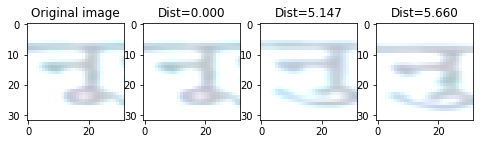

In [44]:
# Similar images
show_similar(X_test[4])

## Using CNN trained in Probelm Statement A

### Using Nearest Neighbours For Image retrieval

In [20]:
images = X_train
codes = model1.predict(images) 
assert len(codes) == len(images)

In [21]:
# using euclidean distance as metric
from sklearn.neighbors import NearestNeighbors
nei_clf = NearestNeighbors(metric="euclidean") ## For image image similarity eucledean distance or manhattan distance can be used
nei_clf.fit(codes)

NearestNeighbors(metric='euclidean')

In [26]:
def get_similar(image, n_neighbors=5):
    assert image.ndim==3,"image must be [batch,height,width,3]"

    code = model1.predict(image[None])
    
    (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=n_neighbors)
    
    return distances,images[idx]

In [27]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

In [28]:
def show_similar(image):    
    distances,neighbors = get_similar(image,n_neighbors=3)
    plt.figure(figsize=[8,7])
    plt.subplot(1,4,1)
    show_image(image)
    plt.title("Original image")
    
    for i in range(3):
        plt.subplot(1,4,i+2)
        show_image(neighbors[i])
        plt.title("Dist=%.3f"%distances[i])
    plt.show()

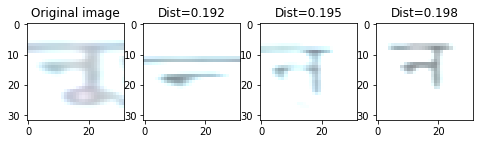

In [29]:
# Similar images
show_similar(X_test[4])